<a href="https://colab.research.google.com/github/naomori/codexa_ImageRecognitionForBeginner/blob/master/Chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3.2: 画像読み込みと表示

画像ファイルを Python で読み込みます。
画像は[ここ](https://www.codexa.net/wp-content/uploads/2018/12/img_sample.jpg)から
ダウンロードします。

2018年11月発売の日経ソフトウェア「[タイタニックでデータ分析 機械学習入門](https://www.amazon.co.jp/%E6%97%A5%E7%B5%8C%E3%82%BD%E3%83%95%E3%83%88%E3%82%A6%E3%82%A8%E3%82%A2-2019%E5%B9%B4-1-%E6%9C%88%E5%8F%B7/dp/B07J3GTYGZ/)」はcodexa機械学習チームが執筆したそうなので、後で読んでおくことにします。

In [0]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

`%matplotlib inline` で notebook 内で図を表示できます。

Google Colab に先程の画像ファイルをアップロードします。*italicized text*

In [2]:
from google.colab import files
uploaded = files.upload() 

Saving img_sample.jpg to img_sample.jpg


まずはカラーで画像データを読み込みます。

In [3]:
# カラーで画像データを読み込み
rgb = cv2.imread('img_sample.jpg', 1)

# オブジェクトの方を確認
print(type(rgb))

<class 'numpy.ndarray'>


OpenCV の imread() 関数を使って画像データを読み込むと、画像は Numpy 配列(numpy.ndarray)へ変換されます。

配列のサイズを以下で確認してみると、200 x 150 のRGB(3次元)画像でした。

In [5]:
print(rgb.shape)

(200, 150, 3)


この配列から 10x10 の 2次元のデータを表示してみます。

".T" により転地をしている理由は、転地をしないと、
2次元目と３次元目の(2x10)の10個分の表示をしてしまうからです。

In [6]:
print(rgb[0:10, 0:10, :2].T)

[[[146 141 169 155 147 177 149  93  14  17]
  [151 173 122 166 169 141 181  79   0  14]
  [177 168 194 239 204 206 202  24   0  73]
  [173 143 225 255 235 247 171  14   0  95]
  [168 192 157 194 203 132 111  82   0 114]
  [194 178  86 161 239 195 164  67   0 120]
  [167 160 188 246 230 215 186  44   0 100]
  [184 169 175 213 164 150 179  64   0  96]
  [179 168 200 234 205 232 206  53   2  21]
  [161 157 175 239 242 223 144  80  49   2]]

 [[ 88  79 101  84  80 109  82  44   1  22]
  [ 97 117  61 106 111  86 124  42   0  34]
  [132 123 147 196 166 171 168  12   5 125]
  [126  98 182 221 203 218 141   5   0 152]
  [111 138 107 148 163  92  67  54   0 149]
  [132 117  32 117 201 154 115  33   1 149]
  [102 101 140 206 198 182 146  17   0 136]
  [124 114 130 177 137 120 137  36   0 127]
  [122 119 161 202 177 201 158  14   0  32]
  [109 109 136 208 216 191  95  38  37   4]]]


In [7]:
print(rgb[0:10, 0:10, :2])

[[[146  88]
  [151  97]
  [177 132]
  [173 126]
  [168 111]
  [194 132]
  [167 102]
  [184 124]
  [179 122]
  [161 109]]

 [[141  79]
  [173 117]
  [168 123]
  [143  98]
  [192 138]
  [178 117]
  [160 101]
  [169 114]
  [168 119]
  [157 109]]

 [[169 101]
  [122  61]
  [194 147]
  [225 182]
  [157 107]
  [ 86  32]
  [188 140]
  [175 130]
  [200 161]
  [175 136]]

 [[155  84]
  [166 106]
  [239 196]
  [255 221]
  [194 148]
  [161 117]
  [246 206]
  [213 177]
  [234 202]
  [239 208]]

 [[147  80]
  [169 111]
  [204 166]
  [235 203]
  [203 163]
  [239 201]
  [230 198]
  [164 137]
  [205 177]
  [242 216]]

 [[177 109]
  [141  86]
  [206 171]
  [247 218]
  [132  92]
  [195 154]
  [215 182]
  [150 120]
  [232 201]
  [223 191]]

 [[149  82]
  [181 124]
  [202 168]
  [171 141]
  [111  67]
  [164 115]
  [186 146]
  [179 137]
  [206 158]
  [144  95]]

 [[ 93  44]
  [ 79  42]
  [ 24  12]
  [ 14   5]
  [ 82  54]
  [ 67  33]
  [ 44  17]
  [ 64  36]
  [ 53  14]
  [ 80  38]]

 [[ 14   1]
  [  0   0]


データの値は、画像のピクセルの値になっています。  
8bitのピクセルなので、0から255までの値を持ちます。  
numpyを使って最小値と最大値を確認してみます。

In [8]:
print(np.min(rgb))
print(np.max(rgb))

0
255


Matplotlib を使って、このNumpy配列を画像に戻すことができます。  
これには Matplotlib の imshow()を使います。

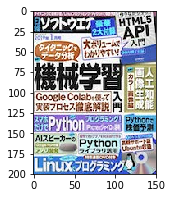

In [9]:
plt.figure(figsize=(6,3))
plt.imshow(rgb)

同じ画像データをグレースケールにするには、データの読み込み時
OpenCV.imread()関数の第二引数に 0 を渡します。
こうすることで、読み込みデータをグレースケールとして読み込みます（[cv.imerad()](http://opencv.jp/opencv-2.1/cpp/reading_and_writing_images_and_video.html#cv-imread)）。

In [10]:
grey = cv2.imread('img_sample.jpg', 0)
print(grey.shape)

(200, 150)


グレースケールは1チャネルなので、２次元の配列となります。

In [11]:
grey[0:10]

array([[109, 114, 140, ...,  71, 115, 121],
       [100, 134, 131, ...,  75, 110, 112],
       [123,  78, 155, ...,  55, 103, 110],
       ...,
       [ 56,  52,  19, ...,   0,  54,  60],
       [  7,   0,   6, ...,  10,   0,  15],
       [ 24,  35, 124, ...,  41,   4,  39]], dtype=uint8)

RGBの場合と同様に、grey でも配列の値は各ピクセルの輝度を表します。Matplotlib を使って配列から画像へ変換してみます。


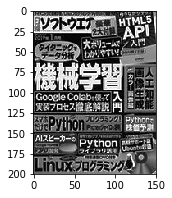

In [12]:
plt.figure(figsize=(6, 3))
plt.imshow(grey, cmap='binary')